# Constituency Parsing with Stanford NLP

Source: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. Each and every word usually belongs to a specific lexical category in the case and forms the head word of different phrases. These phrases are formed based on rules called phrase structure rules.

___Phrase structure rules___ form the core of constituency grammars, because they talk about syntax and rules that govern the hierarchy and ordering of the various constituents in the sentences. These rules cater to two things primarily.

- They determine what words are used to construct the phrases or constituents.
- They determine how we need to order these constituents together.

The generic representation of a phrase structure rule is ___S → AB___ , which depicts that the structure ___S___ consists of constituents ___A___ and ___B___ , and the ordering is ___A___ followed by ___B___. While there are several rules (refer to Chapter 1, Page 19: Text Analytics with Python, if you want to dive deeper), the most important rule describes how to divide a sentence or a clause. 

The phrase structure rule denotes a binary division for a sentence or a clause as ___S → NP VP___ where ___S___ is the sentence or clause, and it is divided into the subject, denoted by the noun phrase ___(NP)___ and the predicate, denoted by the verb phrase ___(VP)___.

A constituency parser can be built based on such grammars/rules, which are usually collectively available as context-free grammar (CFG) or phrase-structured grammar. The parser will process input sentences according to these rules, and help in building a parse tree.

![](constituency_example.png)

We will be using nltk and the StanfordParser here to generate parse trees.

__Prerequisites:__ Download the official Stanford Parser from [here](http://nlp.stanford.edu/software/stanford-parser-full-2015-04-20.zip), which seems to work quite well. You can try out a later version by going to [this website](http://nlp.stanford.edu/software/lex-parser.shtml#Download) and checking the Release History section. After downloading, unzip it to a known location in your filesystem. Once done, you are now ready to use the parser from nltk , which we will be exploring soon.

The Stanford parser generally uses a PCFG (probabilistic context-free grammar) parser. A PCFG is a context-free grammar that associates a probability with each of its production rules. The probability of a parse tree generated from a PCFG is simply the production of the individual probabilities of the productions used to generate it.

You might need to [download](https://www.oracle.com/technetwork/java/javase/downloads/jre8-downloads-2133155.html) and install Java in case you don't have it already.

In [1]:
# set java path
import os
java_path = r'C:\Program Files\Java\jre1.8.0_192\bin\java.exe'
os.environ['JAVAHOME'] = java_path

In [3]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
                     path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
scp

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  after removing the cwd from sys.path.


In [4]:
sentence = 'This NLP Workshop is being organized by Analytics Vidhya as part of the DataHack Summit 2018'
sentence

'This NLP Workshop is being organized by Analytics Vidhya as part of the DataHack Summit 2018'

In [15]:
result = list(scp.raw_parse(sentence))[0]
print(result)

(ROOT
  (S
    (NP (DT This) (NNP NLP) (NNP Workshop))
    (VP
      (VBZ is)
      (VP
        (VBG being)
        (VP
          (VBN organized)
          (PP
            (IN by)
            (NP
              (NP (NNP Analytics) (NNP Vidhya))
              (PP
                (IN as)
                (NP
                  (NP (NN part))
                  (PP
                    (IN of)
                    (NP
                      (DT the)
                      (NNP DataHack)
                      (NNP Summit)
                      (NNP 2018))))))))))))


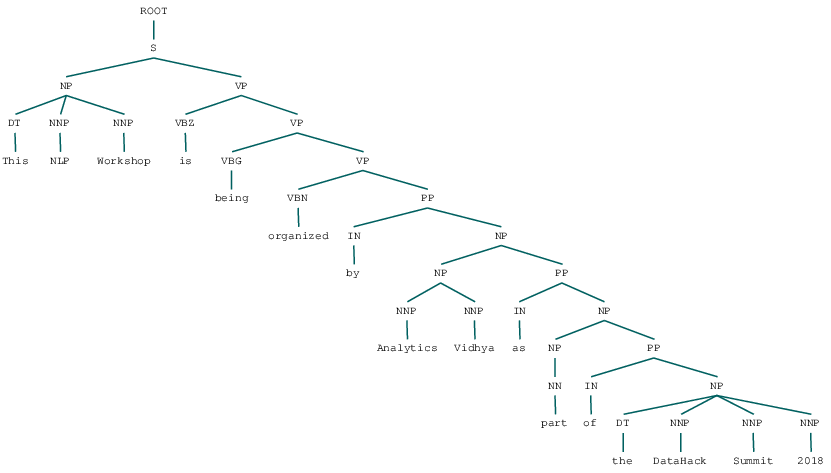

In [16]:
os.environ['PATH'] = os.environ['PATH']+r';C:\Program Files\gs\gs9.25\bin'
result

In [17]:
result.pretty_print()

           ROOT                                                                                     
            |                                                                                        
            S                                                                                       
       _____|___________                                                                             
      |                 VP                                                                          
      |             ____|_______                                                                     
      |            |            VP                                                                  
      |            |     _______|______                                                              
      |            |    |              VP                                                           
      |            |    |        ______|______                                         

We can see the nested hierarchical structure of the constituents in the preceding output as compared to the flat structure in shallow parsing. Refer to the [Penn Treebank reference](https://web.archive.org/web/20130517134339/http://bulba.sdsu.edu/jeanette/thesis/PennTags.html) as needed to lookup other tags.

# Constituency Parsing with Stanford CoreNLP

You may have seen in the above messages that they are deprecating the old Stanford Parsers in favor of the more active Stanford Core NLP Project. It might even get removed after `nltk` version `3.4` so best to stay updated.

Details: https://github.com/nltk/nltk/issues/1839

Step by Step Tutorial here: https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK

Sadly a lot of things have changed in the process so we need to do some extra effort to make it work!

Get CoreNLP from [here](https://stanfordnlp.github.io/CoreNLP/)

After you download, go to the folder and spin up a terminal and start the Core NLP Server locally

```
E:\> java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -preload tokenize,ssplit,pos,lemma,ner,parse,depparse -status_port 9000 -port 9000 -timeout 15000
```

If it runs successfully you should see the following messages on the terminal

```
E:\stanford\stanford-corenlp-full-2018-02-27>java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -preload tokenize,ssplit,pos,lemma,ner,parse,depparse -status_port 9000 -port 9000 -timeout 15000
[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - setting default constituency parser
[main] INFO CoreNLP - warning: cannot find edu/stanford/nlp/models/srparser/englishSR.ser.gz
[main] INFO CoreNLP - using: edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz instead
[main] INFO CoreNLP - to use shift reduce parser download English models jar from:
[main] INFO CoreNLP - http://stanfordnlp.github.io/CoreNLP/download.html
[main] INFO CoreNLP -     Threads: 4
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.4 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.9 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [2.0 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.conll.4class.distsim.crf.ser.gz ... done [0.8 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanford/nlp/models/sutime/jollyday/Holidays_sutime.xml as sutime.binder.1.
[main] INFO edu.stanford.nlp.time.TimeExpressionExtractorImpl - Using following SUTime rules: edu/stanford/nlp/models/sutime/defs.sutime.txt,edu/stanford/nlp/models/sutime/english.sutime.txt,edu/stanford/nlp/models/sutime/english.holidays.sutime.txt
[main] INFO edu.stanford.nlp.pipeline.TokensRegexNERAnnotator - TokensRegexNERAnnotator ner.fine.regexner: Read 580641 unique entries out of 581790 from edu/stanford/nlp/models/kbp/regexner_caseless.tab, 0 TokensRegex patterns.
[main] INFO edu.stanford.nlp.pipeline.TokensRegexNERAnnotator - TokensRegexNERAnnotator ner.fine.regexner: Read 4857 unique entries out of 4868 from edu/stanford/nlp/models/kbp/regexner_cased.tab, 0 TokensRegex patterns.
[main] INFO edu.stanford.nlp.pipeline.TokensRegexNERAnnotator - TokensRegexNERAnnotator ner.fine.regexner: Read 585498 unique entries from 2 files
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... done [4.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator depparse
[main] INFO edu.stanford.nlp.parser.nndep.DependencyParser - Loading depparse model: edu/stanford/nlp/models/parser/nndep/english_UD.gz ...
[main] INFO edu.stanford.nlp.parser.nndep.Classifier - PreComputed 99996, Elapsed Time: 22.43 (s)
[main] INFO edu.stanford.nlp.parser.nndep.DependencyParser - Initializing dependency parser ... done [24.4 sec].
[main] INFO CoreNLP - Starting server...
[main] INFO CoreNLP - StanfordCoreNLPServer listening at /0:0:0:0:0:0:0:0:9000
```

In [8]:
from nltk.parse import CoreNLPParser

cnp = CoreNLPParser()
cnp

In [12]:
result = list(cnp.raw_parse(sentence))[0]
print(result)

(ROOT
  (S
    (NP (DT This) (NNP NLP) (NNP Workshop))
    (VP
      (VBZ is)
      (VP
        (VBG being)
        (VP
          (VBN organized)
          (PP
            (IN by)
            (NP
              (NP (NNP Analytics) (NNP Vidhya))
              (PP
                (IN as)
                (NP
                  (NP (NN part))
                  (PP
                    (IN of)
                    (NP
                      (DT the)
                      (NNP DataHack)
                      (NNP Summit)
                      (CD 2018))))))))))))


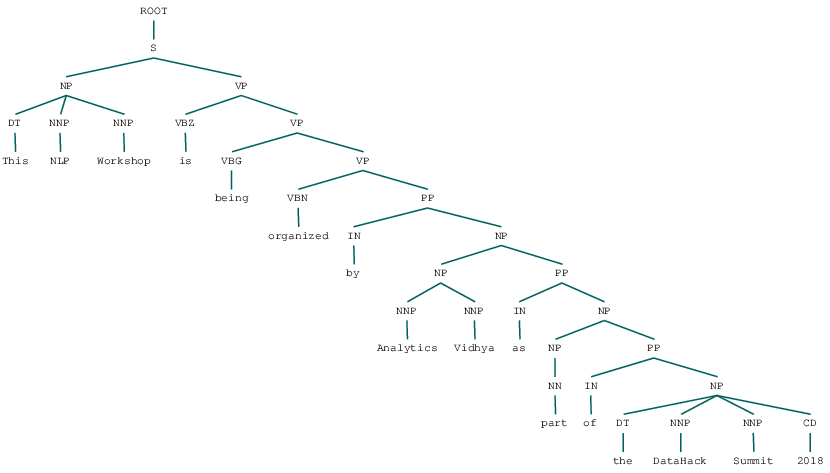

In [13]:
result

In [14]:
result.pretty_print()

           ROOT                                                                                     
            |                                                                                        
            S                                                                                       
       _____|___________                                                                             
      |                 VP                                                                          
      |             ____|_______                                                                     
      |            |            VP                                                                  
      |            |     _______|______                                                              
      |            |    |              VP                                                           
      |            |    |        ______|______                                         

# Dependency Parsing with Spacy

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. The basic principle behind a dependency grammar is that in any sentence in the language, all words except one, have some relationship or dependency on other words in the sentence. The word that has no dependency is called the root of the sentence. The verb is taken as the root of the sentence in most cases. All the other words are directly or indirectly linked to the root verb using links , which are the dependencies.

Considering our sentence ___“The brown fox is quick and he is jumping over the lazy dog”___ , if we wanted to draw the dependency syntax tree for this, we would have the following structure.

![](dependency_example.png)

These dependency relationships each have their own meaning and are a part of a list of universal dependency types. This is discussed in an original paper, [_Universal Stanford Dependencies: A Cross-Linguistic Typology by de Marneffe et al, 2014_](https://nlp.stanford.edu/pubs/USD_LREC14_paper_camera_ready.pdf). You can check out the exhaustive list of dependency types and their meanings [here](http://universaldependencies.org/u/dep/index.html).

If we observe some of these dependencies, it is not too hard to understand them.

- The dependency tag det is pretty intuitive — it denotes the determiner relationship between a nominal head and the determiner. Usually, the word with POS tag DET will also have the det dependency tag relation. Examples include fox → the and dog → the.
- The dependency tag amod stands for adjectival modifier and stands for any adjective that modifies the meaning of a noun. Examples include fox → brown and dog → lazy.
- The dependency tag nsubj stands for an entity that acts as a subject or agent in a clause. Examples include is → fox and jumping → he.
- The dependencies cc and conj have more to do with linkages related to words connected by coordinating conjunctions . Examples include is → and and is → jumping.
- The dependency tag aux indicates the auxiliary or secondary verb in the clause. Example: jumping → is.
- The dependency tag acomp stands for adjective complement and acts as the complement or object to a verb in the sentence. Example: is → quick
- The dependency tag prep denotes a prepositional modifier, which usually modifies the meaning of a noun, verb, adjective, or preposition. Usually, this representation is used for prepositions having a noun or noun phrase complement. Example: jumping → over.
- The dependency tag pobj is used to denote the object of a preposition . This is usually the head of a noun phrase following a preposition in the sentence. Example: over → dog.

Spacy had two types of English dependency parsers based on what language models you use, you can find more details [here](https://spacy.io/api/annotation#section-dependency-parsing). Based on language models, you can use the Universal Dependencies Scheme or the CLEAR Style Dependency Scheme also available in NLP4J now.

In [19]:
import spacy

nlp = spacy.load('en', parse=False, tag=False, entity=False)
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
sentence_nlp = nlp(sentence)

for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                   w_type=token.dep_,
                                   left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                   right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---This[det]--->[]
--------
[]<---NLP[compound]--->[]
--------
['This', 'NLP']<---Workshop[nsubjpass]--->[]
--------
[]<---is[aux]--->[]
--------
[]<---being[auxpass]--->[]
--------
['Workshop', 'is', 'being']<---organized[ROOT]--->['by', 'as']
--------
[]<---by[agent]--->['Vidhya']
--------
[]<---Analytics[compound]--->[]
--------
['Analytics']<---Vidhya[pobj]--->[]
--------
[]<---as[prep]--->['part']
--------
[]<---part[pobj]--->['of']
--------
[]<---of[prep]--->['Summit']
--------
[]<---the[det]--->[]
--------
[]<---DataHack[compound]--->[]
--------
['the', 'DataHack']<---Summit[pobj]--->['2018']
--------
[]<---2018[appos]--->[]
--------


In [20]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

# Dependency Parsing with Stanford NLP

In [21]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
                               path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

sdp

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  """


In [23]:
result = list(sdp.raw_parse(sentence))[0]

In [29]:
# print the dependency tree
print(result.tree())

(organized
  (Workshop This NLP)
  is
  being
  (Vidhya by Analytics (part as (2018 of the DataHack Summit))))


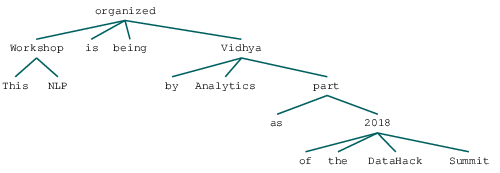

In [30]:
result.tree()

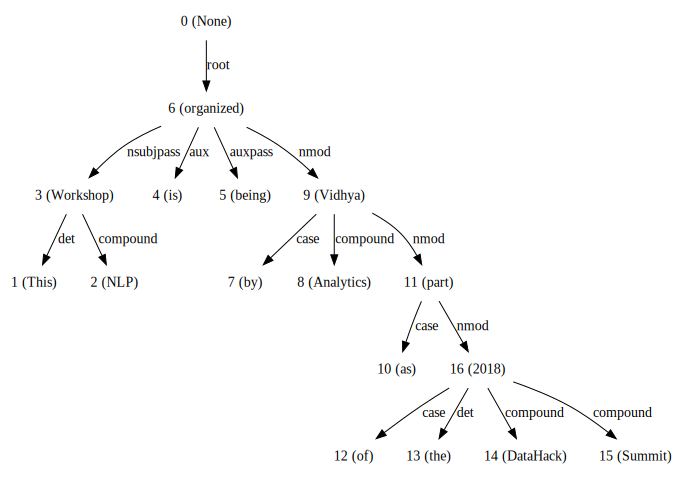

In [26]:
result

# Dependency Parsing with Stanford Core NLP

In [31]:
from nltk.parse.corenlp import CoreNLPDependencyParser

dep_parser = CoreNLPDependencyParser()
dep_parser

In [33]:
result = list(dep_parser.raw_parse(sentence))[0]

In [35]:
print(result.tree())

(organized
  (Workshop This NLP)
  is
  being
  (Vidhya by Analytics)
  (part as (Summit of the DataHack 2018)))


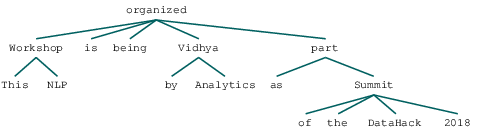

In [36]:
result.tree()

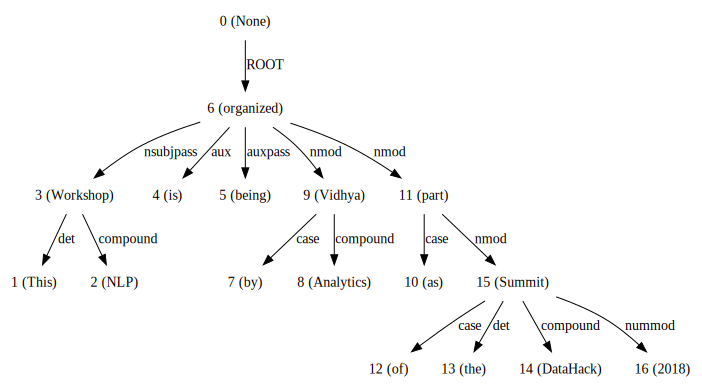

In [34]:
result

In [40]:
list(result.triples())

[(('organized', 'VBN'), 'nsubjpass', ('Workshop', 'NNP')),
 (('Workshop', 'NNP'), 'det', ('This', 'DT')),
 (('Workshop', 'NNP'), 'compound', ('NLP', 'NNP')),
 (('organized', 'VBN'), 'aux', ('is', 'VBZ')),
 (('organized', 'VBN'), 'auxpass', ('being', 'VBG')),
 (('organized', 'VBN'), 'nmod', ('Vidhya', 'NNP')),
 (('Vidhya', 'NNP'), 'case', ('by', 'IN')),
 (('Vidhya', 'NNP'), 'compound', ('Analytics', 'NNP')),
 (('organized', 'VBN'), 'nmod', ('part', 'NN')),
 (('part', 'NN'), 'case', ('as', 'IN')),
 (('part', 'NN'), 'nmod', ('Summit', 'NNP')),
 (('Summit', 'NNP'), 'case', ('of', 'IN')),
 (('Summit', 'NNP'), 'det', ('the', 'DT')),
 (('Summit', 'NNP'), 'compound', ('DataHack', 'NNP')),
 (('Summit', 'NNP'), 'nummod', ('2018', 'CD'))]

In [49]:
print(result.to_conll(4))

This	DT	3	det
NLP	NNP	3	compound
Workshop	NNP	6	nsubjpass
is	VBZ	6	aux
being	VBG	6	auxpass
organized	VBN	0	ROOT
by	IN	9	case
Analytics	NNP	9	compound
Vidhya	NNP	6	nmod
as	IN	11	case
part	NN	6	nmod
of	IN	15	case
the	DT	15	det
DataHack	NNP	15	compound
Summit	NNP	11	nmod
2018	CD	15	nummod



You can notice the similarities with the tree we had obtained earlier. The annotations help with understanding the type of dependency among the different tokens.